In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Loan_Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.select_dtypes(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [8]:
df.select_dtypes(include = 'number')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [9]:
df = df.drop('Loan_ID', axis = 1)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

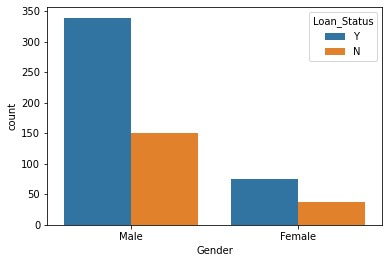

In [13]:
sns.countplot(x = 'Gender', hue= 'Loan_Status', data = df)

In [14]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
df['Gender'].nunique()

2

In [16]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [17]:
df['Gender'].isnull().sum()

0

In [18]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [20]:
df['Married'].fillna(df['Married'].mode()[0],inplace = True)

In [21]:
df['Married'].isnull().sum()

0

In [22]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [24]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
df['Dependents'].isnull().sum()

0

In [26]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [28]:
df['Self_Employed'].isnull().sum()

0

In [29]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

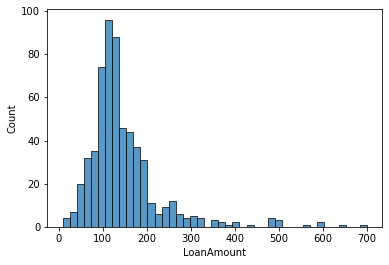

In [30]:
sns.histplot(df['LoanAmount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

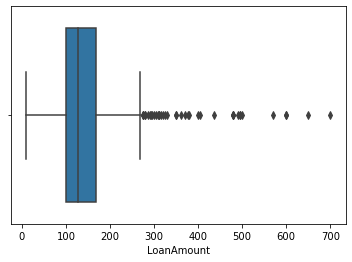

In [31]:
sns.boxplot(df['LoanAmount'])

In [32]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

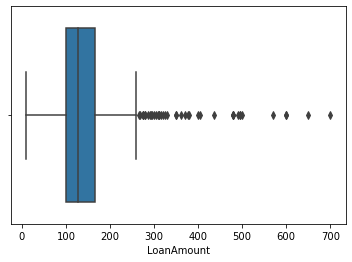

In [33]:
sns.boxplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

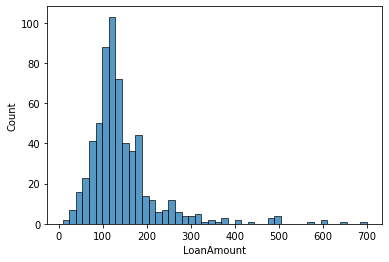

In [34]:
sns.histplot(df['LoanAmount'])

In [35]:
df['LoanAmount'].mean()

145.75244299674267

In [36]:
df['LoanAmount'].median()

128.0

In [37]:
df['LoanAmount'].isnull().sum()

0

In [38]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

In [41]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [43]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [44]:
df['LoanAmount'].isnull().sum()

0

In [45]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

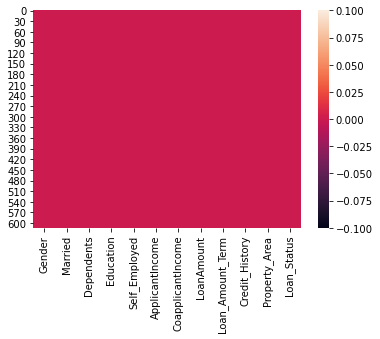

In [46]:
sns.heatmap(df.isnull())

In [47]:
df_categorical = df.select_dtypes(include = 'object')
df_categorical

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [48]:
df_numeric = df.select_dtypes(include = 'number')
df_numeric

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [50]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [51]:
df.shape

(614, 12)

In [52]:
df.Dependents[df.Dependents == '3+'] = 3

<ipython-input-52-626bc3f3c426>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dependents[df.Dependents == '3+'] = 3


In [53]:
df.shape

(614, 12)

In [54]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

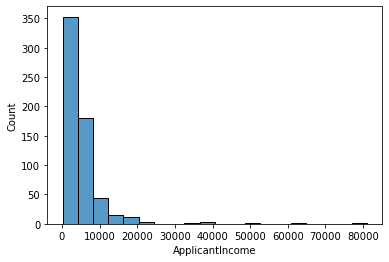

In [63]:
sns.histplot(df['ApplicantIncome'], bins = 20)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

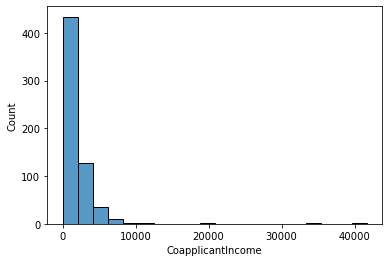

In [64]:
sns.histplot(df['CoapplicantIncome'], bins = 20)

In [66]:
x = df.drop('Loan_Status', axis = 1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [68]:
y = df['Loan_Status']
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [70]:
x = pd.get_dummies(x, drop_first = True)
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1


In [71]:
y = pd.get_dummies(y, drop_first = True)
y.head()

,Y
0,1
1,0
2,1
3,1
4,1


In [72]:
x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.817590,0.653094,0.586319,0.166124,0.164495,0.218241,0.133550,0.379479,0.328990
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.386497,0.476373,0.492894,0.372495,0.371027,0.413389,0.340446,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [100]:
x_train

array([[-0.0437813 ,  0.05675651,  0.43672956, ...,  2.40098019,
         1.29399328, -0.6853091 ],
       [-0.28561013, -0.51532983, -0.39115228, ..., -0.41649656,
        -0.77280154,  1.45919557],
       [-0.26337822, -0.03708629, -0.26808876, ..., -0.41649656,
         1.29399328, -0.6853091 ],
       ...,
       [-0.3108668 , -0.51532983, -0.74915523, ..., -0.41649656,
         1.29399328, -0.6853091 ],
       [-0.00839171, -0.10900019,  0.24654049, ..., -0.41649656,
        -0.77280154, -0.6853091 ],
       [-0.28561013, -0.0448259 , -0.04433691, ..., -0.41649656,
         1.29399328, -0.6853091 ]])

In [101]:
x_test

array([[ 1.49816429, -0.73053019,  0.87359512, ..., -0.31622777,
         1.23474295, -0.74535599],
       [-0.45947308, -0.44405205, -0.57085525, ..., -0.31622777,
         1.23474295, -0.74535599],
       [-0.74885054, -0.20640051, -1.41601237, ..., -0.31622777,
        -0.80988516,  1.34164079],
       ...,
       [ 3.63413616, -0.73053019,  5.2376792 , ..., -0.31622777,
        -0.80988516, -0.74535599],
       [ 1.08395267, -0.73053019,  0.73529668, ..., -0.31622777,
        -0.80988516, -0.74535599],
       [-0.14156209, -0.73053019, -0.04839448, ..., -0.31622777,
        -0.80988516, -0.74535599]])

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 100)
model.fit(x_train, y_train)

C:\Users\SUNIL\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [103]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 10, random_state = 100)
model.fit(x_train, y_train)

<ipython-input-103-45560081eee7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=10, n_estimators=300, random_state=100)

In [104]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [105]:
y_test

,Y
533,0
544,1
41,1
148,0
111,1
...,...
95,0
241,0
308,0
289,1


In [106]:
y_pred_ds = pd.DataFrame(y_pred, columns = ['Predicted Values'])
y_pred_ds

,Predicted Values
0,1
1,1
2,1
3,1
4,1
...,...
149,1
150,1
151,1
152,1


In [107]:
y_test_ds = pd.DataFrame(np.array(y_test), columns= ['Actual Values'])
pd.concat([y_test_ds,y_pred_ds], axis= 1)

,Actual Values,Predicted Values
0,0,1
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
149,0,1
150,0,1
151,0,1
152,1,1


In [108]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 19  30]
 [  2 103]]
0.7922077922077922
              precision    recall  f1-score   support

           0       0.90      0.39      0.54        49
           1       0.77      0.98      0.87       105

    accuracy                           0.79       154
   macro avg       0.84      0.68      0.70       154
weighted avg       0.82      0.79      0.76       154

